# Color compression of an image with K-Means Clustering Algorithm

### loading of libraries

In [0]:
!git clone https://github.com/niazwazir/TestImage.git

Cloning into 'TestImage'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 33 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (33/33), done.


In [0]:
import numpy as np
import cv2
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
from time import time

(400, 400, 3)


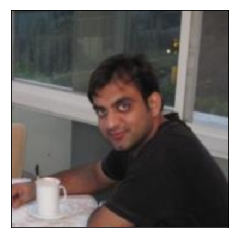

In [0]:
china=io.imread('TestImage/man.jpg')
china1=io.imread('TestImage/man.jpg')
img = io.imread('TestImage/man.jpg')
imga = cv2.imread("TestImage/man.jpg")
china=cv2.resize(china,(400,400))
plt.xticks([])
plt.yticks([])
plt.imshow(china)
print (china.shape)
plt.show()

In [0]:
data=china.reshape(-1,3)
data.shape

(160000, 3)

In [0]:
km=KMeans(n_clusters=10)
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
dominant_colors=km.cluster_centers_.astype(np.uint8)

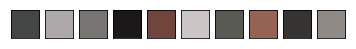

In [0]:
plt.figure(0)

for i in range(dominant_colors.shape[0]):
    plt.subplot(1,dominant_colors.shape[0],i+1)
    plt.xticks([])
    plt.yticks([])
    col=np.zeros((100,100,3),dtype=np.uint8)
    col[:,:,:]=dominant_colors[i]
    plt.imshow(col)

In [0]:
new_image=np.zeros_like(data)
labels=km.predict(data)
print (np.unique(labels,return_counts=False))

[0 1 2 3 4 5 6 7 8 9]


In [0]:
for ix in range(len(new_image)):
    new_image[ix,:]=dominant_colors[labels[ix]]
    

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


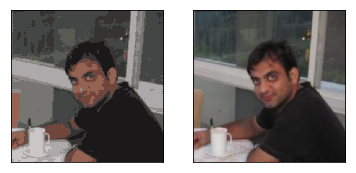

In [0]:
#new image
plt.subplot(1, 2, 1)
plt.grid("off")
plt.xticks([])
plt.yticks([])
plt.imshow(new_image.reshape(china.shape))

#actual image
plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.imshow(china)

Fitting model on a small sub-sample of the data
done in 0.187s.
Predicting color indices on the full image (k-means)
done in 0.082s.
Predicting color indices on the full image (random)
done in 0.079s.


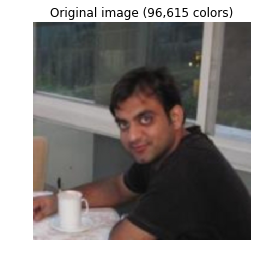

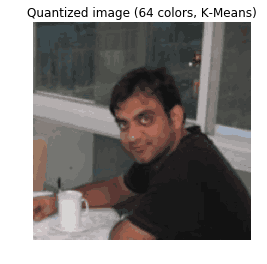

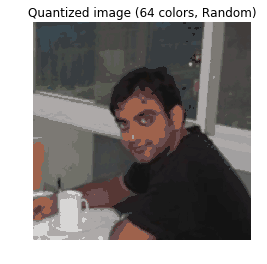

In [0]:
n_colors = 32
# Load the  photo
#china = load_sample_image('baby_x2_GT.png')

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))


codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

(400, 400, 3)


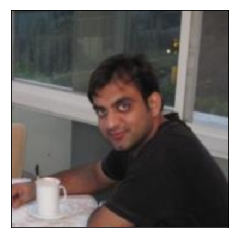

In [0]:
china1=cv2.resize(china1,(400,400))
plt.xticks([])
plt.yticks([])
plt.imshow(china1)
print (china1.shape)
plt.show()

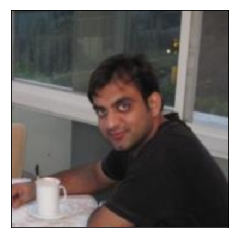

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.datasets import load_sample_image
ax = plt.axes(xticks=[],yticks=[])
ax.imshow(china1)


### dimensions of array

In [0]:
china1.shape

(400, 400, 3)

### reshaping the data to n_samples by n_features and rescaling the colors so that they lie between 0 and 1

In [0]:
data = china1/255.0 # use 0...1 scale
data = data.reshape(400*400,3)
data.shape

(160000, 3)

### visualizing these pixels in this color space, using a subset of 10,000 pixels for efficiency

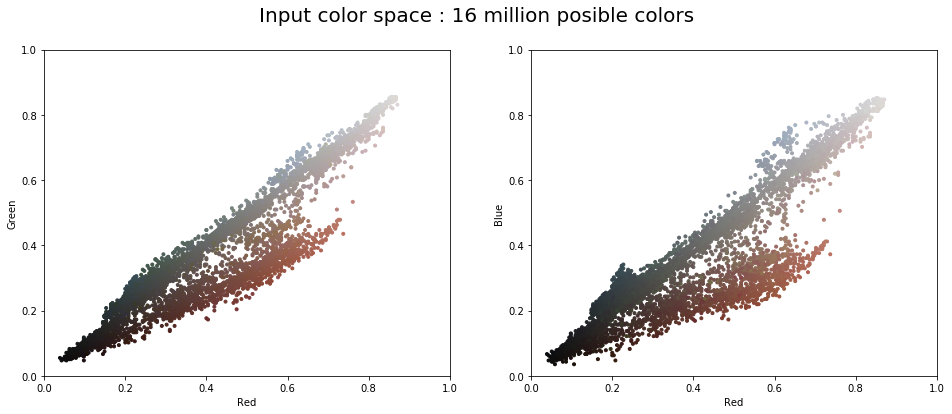

In [0]:
def plot_pixels(data,title,colors=None,N=10000):
        if colors is None:
            colors = data
        # choose a random subset
        rng = np.random.RandomState(0)
        i = rng.permutation(data.shape[0])[:N]
        colors = colors[i]
        R,G,B = data[i].T
        
        fig,ax = plt.subplots(1,2,figsize=(16,6))
        ax[0].scatter(R,G,color=colors,marker='.')
        ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
        
        ax[1].scatter(R,B,color=colors,marker='.')
        ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
        
        fig.suptitle(title,size=20)
        
plot_pixels(data,title="Input color space : 16 million posible colors")


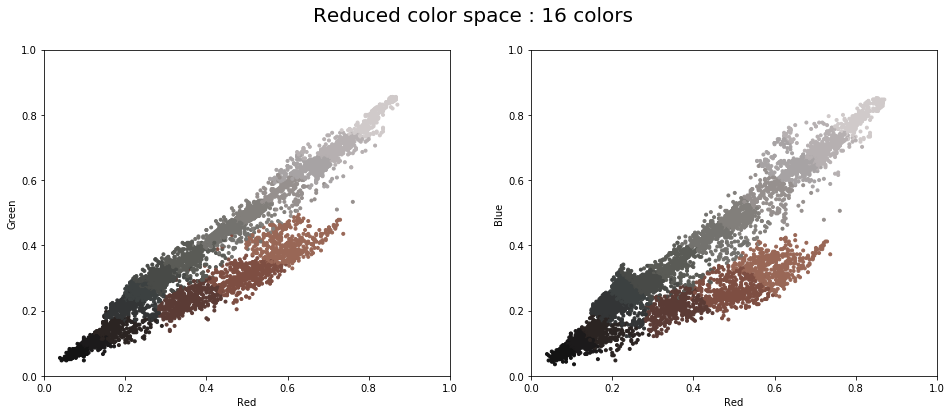

In [0]:
import warnings
#warnings.simplefilter('ignore') # fix numpy issues
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data,title="Reduced color space : 16 colors ",colors=new_colors)

Text(0.5, 1.0, 'Image Extracted From 16-color Image')

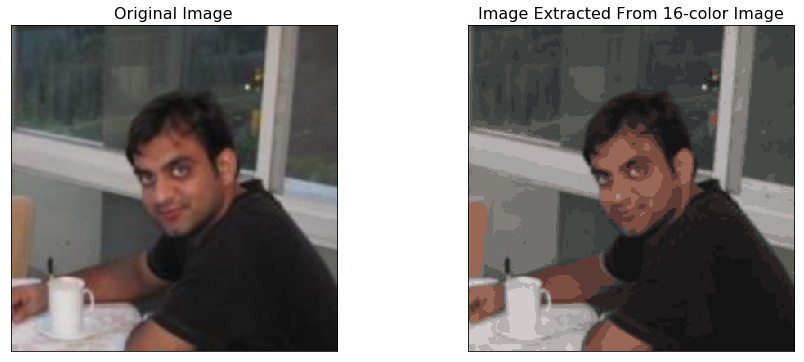

In [0]:
china_recolored = new_colors.reshape(china1.shape)

fig,ax = plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china1)
ax[0].set_title('Original Image',size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('Image Extracted From 16-color Image',size=16)

Part 1: Color point analysis of an image pixels with **KMeans**

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

from sklearn.cluster import KMeans

import platform
print(platform.python_version())

Populating the interactive namespace from numpy and matplotlib
3.6.8


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['shuffle', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Populating the interactive namespace from numpy and matplotlib
2.7.13
The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields. For more information: http://scikit-learn.org/stable/modules/clustering.html

This algorithm is guaranteed to converge to a result. The result may be a local optimum (i.e. not necessarily the best possible outcome), meaning that assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.

We will cluster color points of an each pixel of an image. In this context, color point of a pixel refers to R/G and B/G values for each pixel in RGB space.

**load** an image

In [0]:
#img = cv2.imread('TestImage/man.jpg')
if img is None:
    print("Could not open or find the image")


In [0]:
# OpenCV follows BGR order, while matplotlib follows RGB order.
# So when we display an image loaded in OpenCV using pylab functions, we need to convert it into RGB mode
def show_opencv_image(img):
    plt.imshow(img[:,:,::-1])

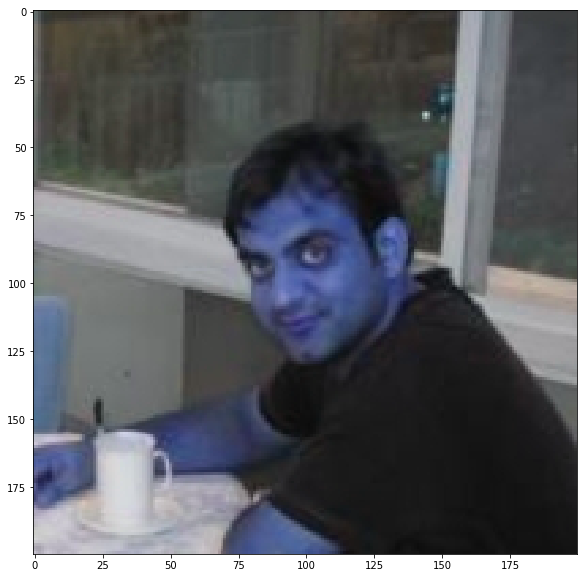

In [0]:
show_opencv_image(img)

prepare data
As openCV color channels are in BGR order, we first convert the order of color channels from BGR to RGB, that is more intiutive when working with colors. Then we resphape the image in two dimensional array. An image loaded with opencv has three dimensions (h, w, #channels), so we convert it to two dimensional array (h*w, #channels). It is easier to work on 2D array than 3D array.

In [0]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb.shape

(200, 200, 3)

In [0]:
img_2d = img_rgb.reshape(img_rgb.shape[0]* img_rgb.shape[1], 3)
img_2d.shape

(40000, 3)

In [0]:
img_2d

array([[101, 109, 108],
       [ 98, 104, 103],
       [ 81,  86,  84],
       ...,
       [ 19,  19,  19],
       [ 19,  19,  19],
       [ 19,  19,  19]], dtype=uint8)

When we work with KMeans algorithm, we have (h * w) rows corresponding pixels and each pixel will have two features, R/G and B/G. So we will have two columns representing our feautures.


In [0]:
def compute_features_color_point(image_2d):
    r = image_2d[:,0]
    g = image_2d[:,1]
    b = image_2d[:,2]
    r = r.astype(float)
    g = g.astype(float)
    b = b.astype(float)
    rg = r/g
    bg = b/g
    return np.vstack((rg,bg)).T

In [0]:
img_color_point = compute_features_color_point(img_2d)
img_color_point.shape

(40000, 2)

In [0]:
img_color_point

array([[0.9266055 , 0.99082569],
       [0.94230769, 0.99038462],
       [0.94186047, 0.97674419],
       ...,
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ]])

explore KMeans
KMeans algorithm accepts number of clusters as an input. The function below accept a list of K that we want to give as an input to algorithm and it returns the list of models. This allows us to run the algorithm once for the different K values that we want to explore and later on we can work with the models further. We also provide input image as prepared above as an input to function. KMeans is going to cluster the each image pixel regarding the two features.

In [0]:
def explore_K(n_cluster_list, X):
    clt_ = list()
    for i in n_cluster_list:
        print("n_clusters: ", i)
        clt = KMeans(n_clusters=i).fit(X)
        clt_.append(clt)
    return clt_
  

In [0]:
K_values= [2,3,4,5,6,7,8,9]
# Be patient ! 
# Depending the number of K, list lenght and input image, function call below can take a while !
clt_model_list = explore_K(K_values, img_color_point)

n_clusters:  2
n_clusters:  3
n_clusters:  4
n_clusters:  5
n_clusters:  6
n_clusters:  7
n_clusters:  8
n_clusters:  9


In [0]:
clt_model_list

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorit

plot centroids


In [0]:
def plot_centroids(clt):
    """
    plot the centroids of each cluster
    """
    marker_list = ['o', 'v', 's', '*', '+', 'x', '8', 'D']
    for i in range(len(clt.cluster_centers_)):
        plt.scatter(clt.cluster_centers_[i,0],
                    clt.cluster_centers_[i,1], 
                    marker=marker_list[i], 
                    s=200,
                    color='k', 
                    label=i)
    plt.legend()
    plt.title("centroids")
    plt.xlabel("R/G")
    plt.ylabel("B/G")

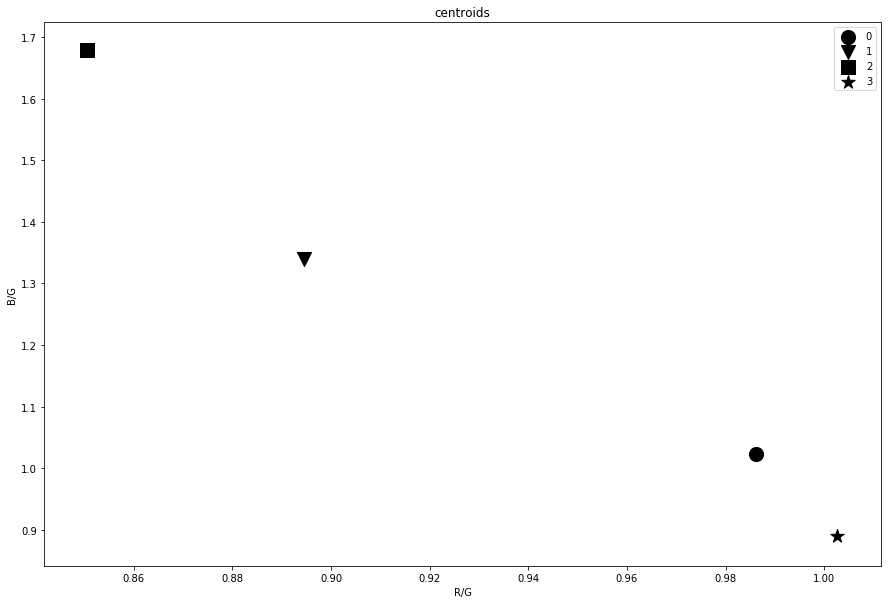

In [0]:
# We can select a model from the list and plot the centroids
plot_centroids(clt_model_list[2]) # index 2 corresponds to model with n_clusters=4 (python list index starts with zero)

plot all clusters with centroids

In [0]:
def plot_clusters(clt, X):
    """
    plot the centroids and clusters (of pixels) with different color and shape
    """
    marker_list = ['o', 'v', 's', '*', '+', 'x', '8', 'D']
    color_list = ['k', 'grey', 'r', 'g', 'b', 'c', 'm', 'y']
    labels = np.unique(clt.labels_)
    for l in labels:
        index = np.where(clt.labels_ == labels[l])
        plt.scatter(X[index, 0], 
                    X[index, 1], 
                    marker=marker_list[l], 
                    color=color_list[l])
        
    # plot centroids
    for i in range(len(clt.cluster_centers_)):
        plt.scatter(clt.cluster_centers_[i,0],
                    clt.cluster_centers_[i,1], 
                    marker=marker_list[i], s=200,
                    color='k', label=i)
    plt.legend()
    plt.xlabel("R/G")
    plt.ylabel("B/G")
    plt.title("clusters")

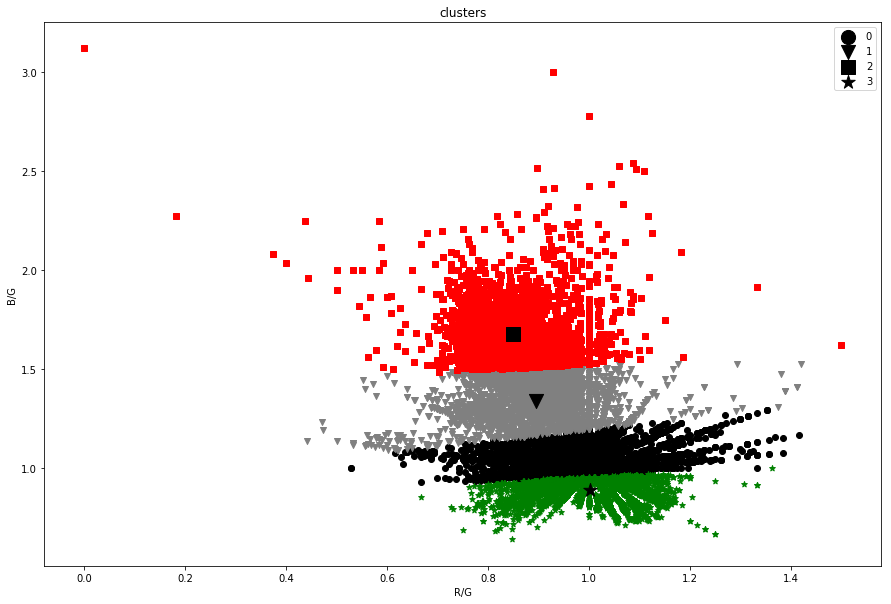

In [0]:
# plotting can take a while! 
plot_clusters(clt_model_list[2], img_color_point)


find elbow point
Which K is the best to use. One straightforward method is elbow method. (https://en.wikipedia.org/wiki/Elbow_method_(clustering)). Checking the inertia (sum of squared distances of samples to their closest cluster center.) vs. K can give an idea about elbow point. The function below plot the squared root of inertia vs K.

In [0]:
def plot_k_vs_inertia(clt_list):
    for i, v in enumerate(clt_list):
        plt.plot(v.n_clusters, np.sqrt(v.inertia_), '-o')
    plt.xlabel("number of clusters (K)")
    plt.ylabel("inertia (distance)")

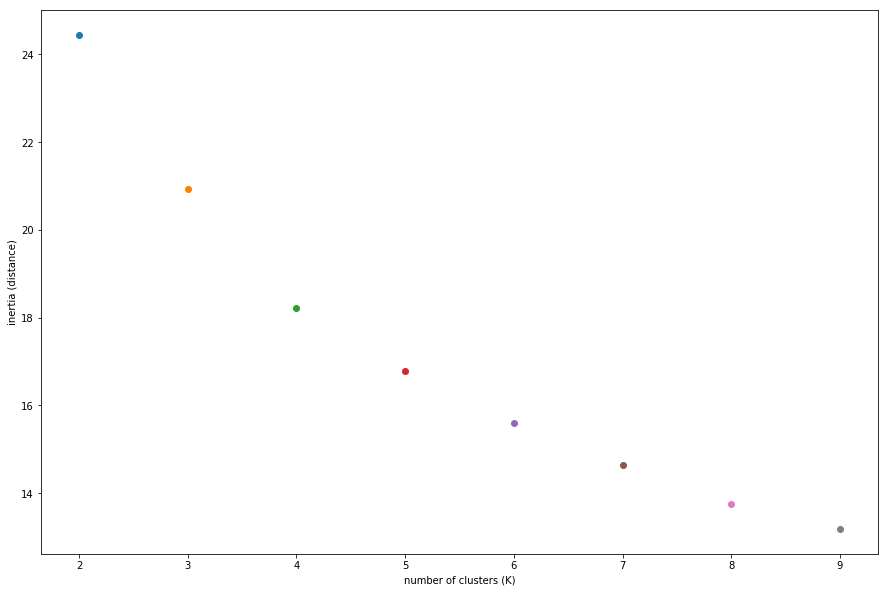

In [0]:
plot_k_vs_inertia(clt_model_list)

histogram
We can also plot the number of pixels belonging to each cluster by using histogram.


In [0]:
def histogram_color_point(clt):
    num_labels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=num_labels)
    return hist

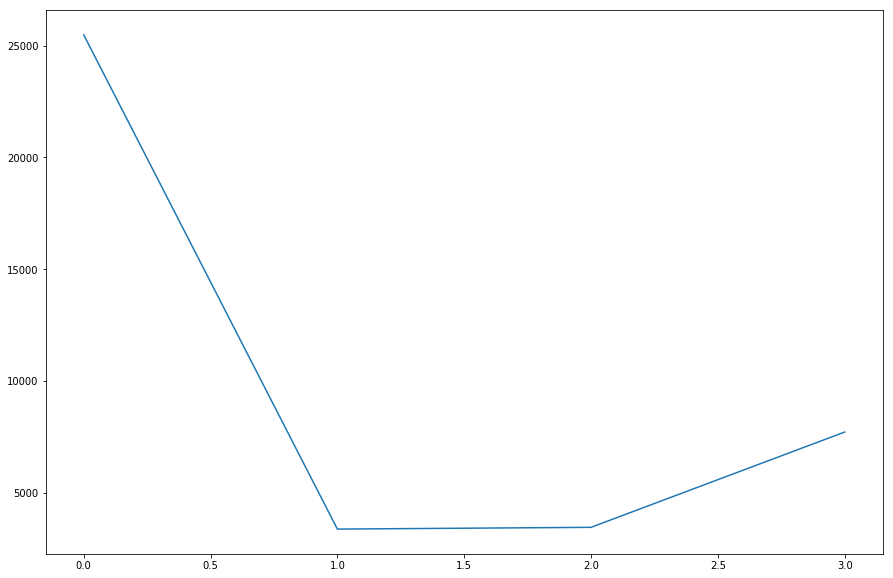

In [0]:
hist= histogram_color_point(clt_model_list[2])
plt.plot(hist)

show the clusters in original image dimension
It would be useful to visualize which pixel in an image belongs to which cluster.

In [0]:
def plot_clusters_2d(clt, image):
    labels = np.unique(clt.labels_)
    red = [255, 0, 0]
    green = [0, 128, 0]
    blue = [0, 0, 255]
    cyan = [0, 255, 255]
    magenta = [255, 0, 255]
    yellow = [255, 255, 0]
    black = [0,0,0]
    grey = [128,128,128]
    rgb_colors = [black, grey, red, green, blue, cyan, magenta, yellow]
    for l in labels:
        index = np.where(clt.labels_ == labels[l])
        image[index] = rgb_colors[l]
    return image

In [0]:
image = plot_clusters_2d(clt_model_list[2], img_2d)
img_cluster = image.reshape(img_rgb.shape[0], img_rgb.shape[1], 3)

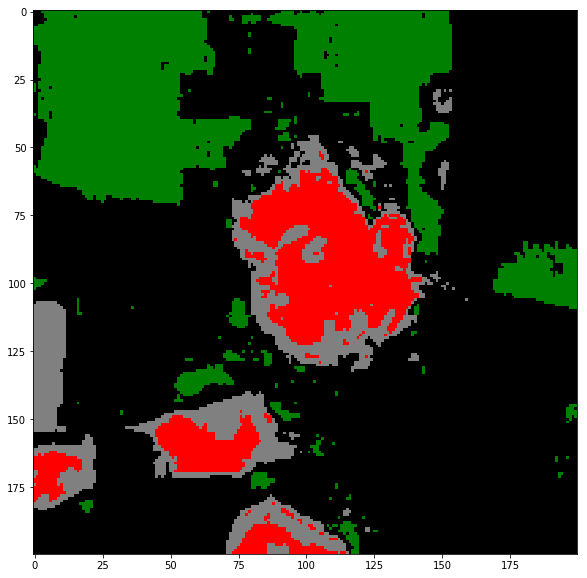

In [0]:
plt.imshow(img_cluster)

Part 2: Intensity analysis of an image pixels with KMeans

In [0]:
# Lets use the same input image, we apply similar data preparation as we have done above.
img_rgb_intensity = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_2d_intensity = img_rgb_intensity.reshape(img_rgb_intensity.shape[0]* img_rgb_intensity.shape[1], 3)
img_2d_intensity.shape

(40000, 3)

In [0]:
# For intensity analysis, we use sum of the color channel values as an feature.
def compute_intensity_feature(image_2d):
    r = image_2d[:,0]
    g = image_2d[:,1]
    b = image_2d[:,2]
    r = r.astype(float)
    g = g.astype(float)
    b = b.astype(float)
    sum_rgb = r + g + b
    return sum_rgb.reshape(image_2d.shape[0], 1)

In [0]:
image_intensity = compute_intensity_feature(img_2d_intensity)

In [0]:
image_intensity.shape

(40000, 1)

In [0]:
clt_model_intensity = explore_K([4], image_intensity)

n_clusters:  4


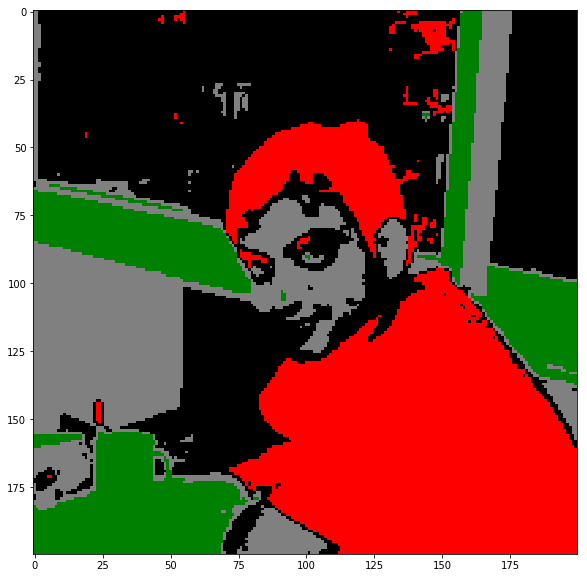

In [0]:
image = plot_clusters_2d(clt_model_intensity[0], img_2d_intensity)
img_cluster = image.reshape(img_rgb_intensity.shape[0], img_rgb_intensity.shape[1], 3)
plt.imshow(img_cluster)

In [0]:
from sklearn.cluster import KMeans
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [0]:
#imga = cv2.imread("TestImage/man.jpg")
imga = cv2.cvtColor(imga, cv2.COLOR_BGR2RGB)

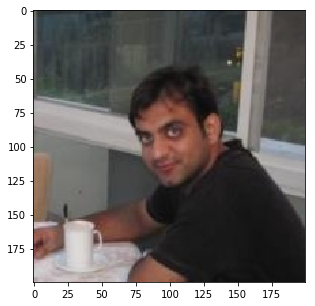

(200, 200, 3)


In [0]:
plt.figure(figsize=(10,5))
plt.imshow(imga)
plt.show()
print (imga.shape)

In [0]:
c_img = imga.copy()
#FLATTEN THE IMAGE
c_img = np.reshape(c_img, (-1,3))

print (c_img.shape)

(40000, 3)


In [0]:
kmeans = KMeans(n_clusters=7,random_state=2)

In [0]:
kmeans.fit_predict(c_img)

array([2, 2, 6, ..., 4, 4, 4], dtype=int32)

In [0]:
centers = kmeans.cluster_centers_.astype(int)

print (centers)

[[171 166 166]
 [ 57  58  57]
 [122 119 115]
 [203 196 197]
 [ 27  25  25]
 [139  91  76]
 [ 77  74  71]]


In [0]:
per = np.array(np.unique(kmeans.labels_, return_counts=True)[1], dtype=np.float32)
per = per/c_img.shape[0]

print(per)

[0.1128   0.17895  0.120825 0.031475 0.247    0.08185  0.2271  ]


In [0]:
dom = [ [per[ix], centers[ix]] for ix in range(kmeans.n_clusters) ]
#print (dom)
DOM = sorted(dom, reverse=True)

print (DOM)

[[0.247, array([27, 25, 25])], [0.2271, array([77, 74, 71])], [0.17895, array([57, 58, 57])], [0.120825, array([122, 119, 115])], [0.1128, array([171, 166, 166])], [0.08185, array([139,  91,  76])], [0.031475, array([203, 196, 197])]]


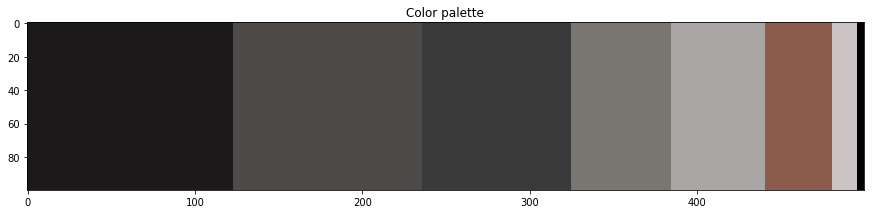

In [0]:
color_p = np.zeros((100,500,3)).astype(int)

start = 0
for ix in range(kmeans.n_clusters):
    width = int( (DOM[ix][0])*color_p.shape[1] )
    
    end = start+width
    color_p[:,start:end, :] = DOM[ix][1]
    start = end
    
plt.imshow(color_p)
plt.title("Color palette")
plt.show()

In [0]:
#VISUALIZE THE DOMINANT COLOR

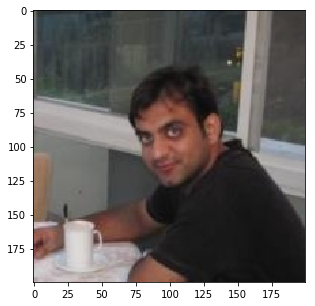

(200, 200, 3)


In [0]:
plt.figure(figsize=(10,5))
plt.imshow(imga)
plt.show()
print (imga.shape)

In [0]:
for ix in range(c_img.shape[0]):
    c_img[ix] = centers[kmeans.labels_[ix]]
    
c_img = np.reshape(c_img, (img.shape[0], img.shape[1], 3))

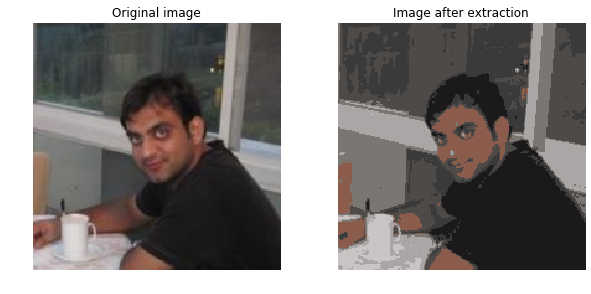

In [0]:
plt.figure(0,figsize=(10,10))

plt.subplot(221)
plt.title("Original image")
plt.axis("off")
plt.imshow(imga)


plt.subplot(222)
plt.title("Image after extraction")
plt.axis("off")
plt.imshow(c_img)


plt.show()